# Exploratory Data Analysis on Retail_Sales_Data Project

## Import neccessary libraries
### Load Dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "retail_sales_dataset.csv"
data = pd.read_csv(file_path)

## Explore the Dataset
### Display the first few rows

In [4]:
# Display the first few rows
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Check data types

In [8]:
# Check data types
data_types = data.dtypes
data_types

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

## Clean Data
### Handle missing values

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n"), missing_values

Missing Values:



(None,
 Transaction ID      0
 Date                0
 Customer ID         0
 Gender              0
 Age                 0
 Product Category    0
 Quantity            0
 Price per Unit      0
 Total Amount        0
 dtype: int64)

In [4]:
# drop rows with missing values
data_cleaned = data.dropna()
data_cleaned

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


## Handling duplicates
### Remove duplicates

In [77]:
# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


## Descriptive statistics
### Summary statistics for numerical columns

In [15]:
# Summary statistics for numerical columns
descriptive_stats = data_cleaned.describe()
print("Descriptive Statistics:\n"), descriptive_stats

Descriptive Statistics:



(None,
        Transaction ID         Age     Quantity  Price per Unit  Total Amount
 count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
 mean       500.500000    41.39200     2.514000      179.890000    456.000000
 std        288.819436    13.68143     1.132734      189.681356    559.997632
 min          1.000000    18.00000     1.000000       25.000000     25.000000
 25%        250.750000    29.00000     1.000000       30.000000     60.000000
 50%        500.500000    42.00000     3.000000       50.000000    135.000000
 75%        750.250000    53.00000     4.000000      300.000000    900.000000
 max       1000.000000    64.00000     4.000000      500.000000   2000.000000)

### Calculate additional statistics

In [99]:
# Calculate additional statistics
mean_sales = data_cleaned['Total Amount'].mean()
median_sales = data_cleaned['Total Amount'].median()
mode_sales = data_cleaned['Total Amount'].mode()
standard_deviation = data_cleaned['Total Amount'].std()

print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Mode of Sales:", mode_sales)
print("Standard Deviation:", standard_deviation)

Mean Sales: 456.0
Median Sales: 135.0
Mode of Sales: 0    50
Name: Total Amount, dtype: int64
Standard Deviation: 559.997631555123


## Handling outliers
### Identify Outliers

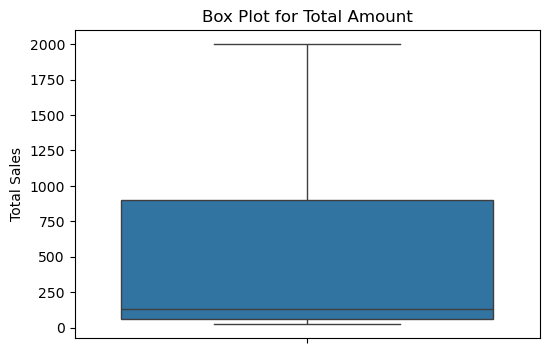

In [112]:
# Cheking for Outliers

plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='Total Amount')
plt.title('Box Plot for Total Amount')
plt.ylabel('Total Sales')
plt.show()

## Time Series Analysis
### Convert date column to datetime format and set it as the index

In [ ]:
# Convert date column to datetime format and set it as the index

data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%Y-%m-%d', errors='coerce')
data_cleaned.set_index('Date', inplace=True)

### Converting the 'Date' column to datetime format

In [97]:
# Converting the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
# Setting 'Date' as the index for time series analysis
data.set_index('Date', inplace=True)

### Setting 'Date' as the index for time series analysis

In [96]:
# Setting 'Date' as the index for time series analysis
data.set_index('Date', inplace=True)



## Seasonal patterns or trends using line plots

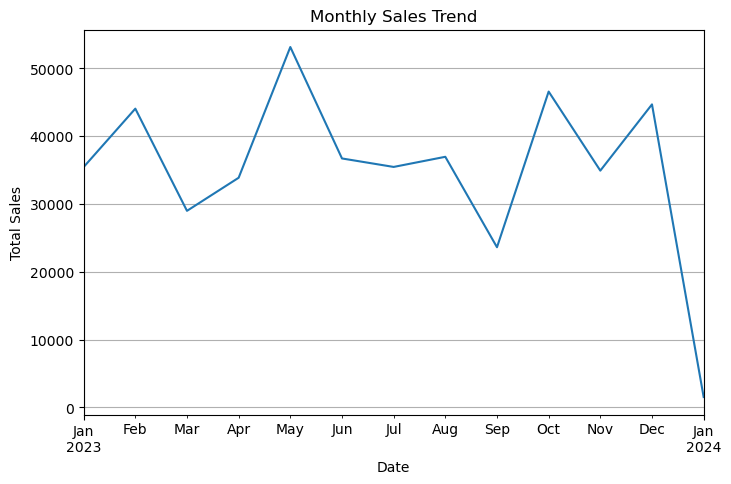

In [114]:
# Resampling data to calculate monthly total sales
monthly_sales = data_cleaned['Total Amount'].resample('ME').sum()

# Plotting the monthly sales trend
monthly_sales.plot(title='Monthly Sales Trend', xlabel='Date', ylabel='Total Sales', figsize=(8, 5))
plt.grid(True)
plt.show()

## Customer and Product Analysis
### Grouping data by Gender and summarizing total sales

<Axes: title={'center': 'Sales by Gender'}, ylabel='Total Sales'>

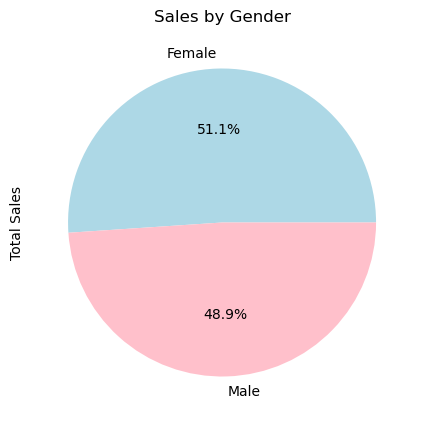

In [126]:
# Grouping data by Gender and summarizing total sales
gender_sales = data_cleaned.groupby('Gender')['Total Amount'].sum()



# Plotting sales by Gender
gender_sales.plot(kind='pie', title='Sales by Gender', xlabel='Gender', ylabel='Total Sales', figsize=(8, 5), autopct='%1.1f%%', colors=['lightblue', 'pink'])



### Grouping data by Age and summarizing total sales

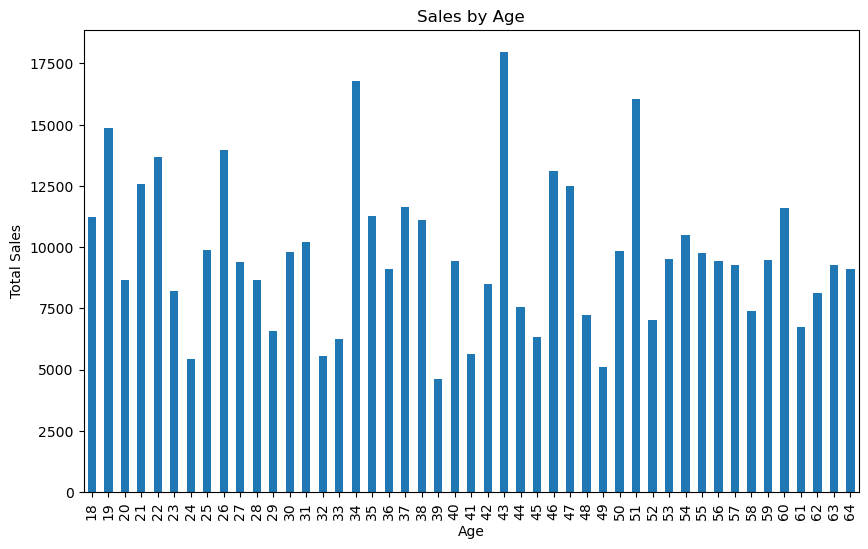

In [153]:
# Grouping data by Age and summarizing total sales
age_sales = data_cleaned.groupby('Age')['Total Amount'].sum()

# Plotting sales by Age
age_sales.plot(kind='bar', title='Sales by Age', xlabel='Age', ylabel='Total Sales', figsize=(10, 6))
plt.grid(False)
plt.show()

## Top product categories by total sales

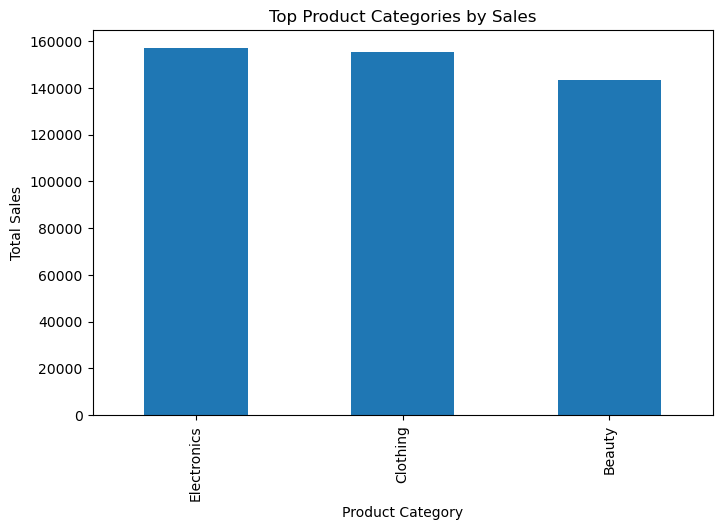

In [ ]:
# Top product categories by total sales
top_categories = data_cleaned.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(5)

# Plotting top categories
top_categories.plot(kind='bar', title='Top Product Categories by Sales', xlabel='Product Category', ylabel='Total Sales', figsize=(8, 5))
plt.show()


## Customer Purchasing Behavior
### Analyze average spend per customer and frequency of purchases.

<Axes: title={'center': 'Sales by Customer Segment'}, xlabel='Segment', ylabel='Sales'>

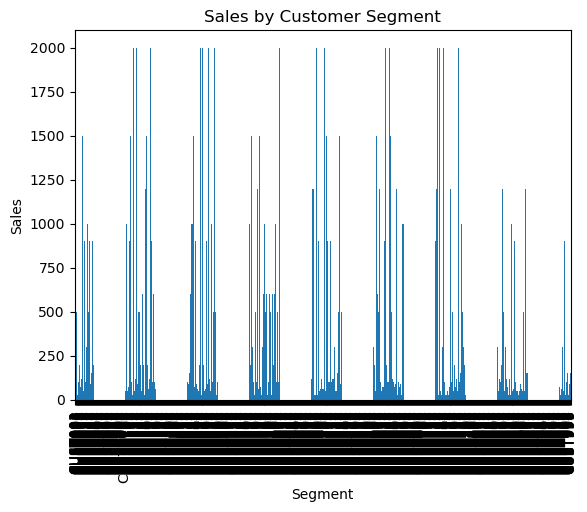

In [ ]:
# Analyze sales by customer demographics
customer_sales = data_cleaned.groupby('Customer ID')['Total Amount'].sum()
# Bar chart for customer sales
customer_sales.plot(kind='bar', title="Sales by Customer Segment", xlabel="Segment", ylabel="Sales",)

## Heatmap for correlation matrix

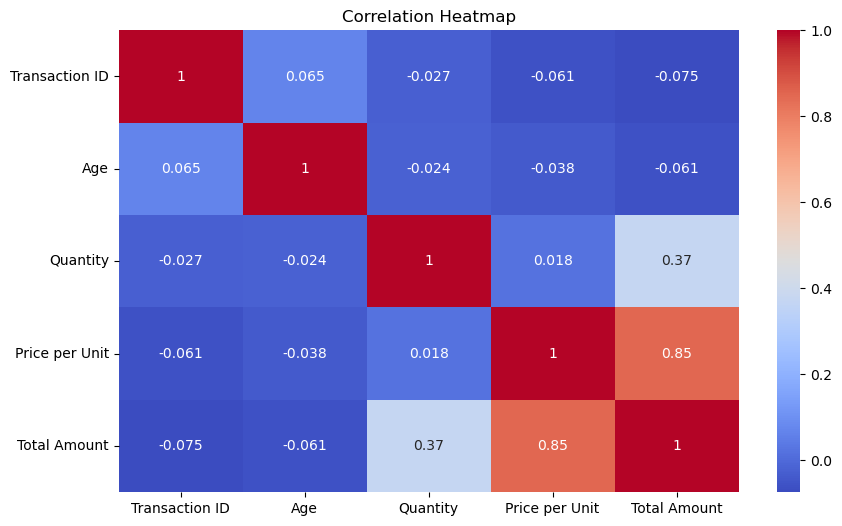

In [143]:
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])


# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Insights and Recommendations
### 1. Insights from Time Series Analysis
- Trend Observation: 
    - If monthly sales trends show peaks during certain months (February, May, October and December), these might align with holidays, seasons, or promotions.
- Recommendation:
    - Plan marketing campaigns and stock inventory strategically for peak months.
    - Introduce seasonal promotions or discounts to sustain sales during low-performing months.

### 2. Insights from Customer Demographics
- Gender Analysis: 
    - If one gender (Female) contributes significantly more to sales, it indicates their preference for your product categories.
- Recommendation:
    - Focus marketing efforts on the higher-spending gender group.
    - Explore ways to attract the lower-spending group, such as gender-specific discounts or promotions.
- Age Analysis: 
    - Identify age groups that contribute the most to sales (Young Adults and Middle aged).
- Recommendation:
    - Tailor products and advertising campaigns to cater to the preferences of top-performing age groups.
    - Use social media platforms or targeted ads to engage younger or underrepresented groups.

### 3. Insights from Product Performance
- Top Categories: 
    - Focus on high-performing product categories (Electronics and clothing).
- Recommendation:
    - Expand inventory for top-selling categories.
    - Highlight these categories in marketing campaigns.
- Low-Performing Categories: 
    - Identify categories with low sales(Beauty).
- Recommendation:
    - Evaluate the reasons for underperformance (e.g., poor quality, lack of demand).
    - Improve these products or replace them with more popular alternatives.

### 4. General Business Strategies
- Bundle Offers: Combine popular products with slower-moving items to increase overall sales.
    - Customer Retention: Offer loyalty programs for repeat customers, especially those in high-spending segments.
    - Expand Marketing Channels: Use insights from demographics to focus on appropriate platforms (e.g., social media for younger customers).
